In [1]:
import seaborn as sns
DF = sns.load_dataset('iris')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = DF[['sepal_length','sepal_width','petal_length','petal_width']]
y=DF['species']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2045)

print('Train Data :', X_train.shape, y_train.shape)
print('Test Data :', X_test.shape, y_test.shape)

Train Data : (105, 4) (105,)
Test Data : (45, 4) (45,)


In [8]:
DF['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [9]:
print(y_train.value_counts(), '\n\n', y_test.value_counts())

setosa        35
virginica     35
versicolor    35
Name: species, dtype: int64 

 setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64


In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.3, penalty='l2', multi_class='multinomial', n_jobs=-1)
LR.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

LR_mse = accuracy_score(y_test, LR.predict(X_test))
print(LR_mse)
print(confusion_matrix(y_test, LR.predict(X_test)))

0.9333333333333333
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2045)
DT.fit(X_train, y_train)

DT_mse = accuracy_score(y_test, DT.predict(X_test) )
print(DT_mse)
print(confusion_matrix(y_test, DT.predict(X_test)))

0.8888888888888888
[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


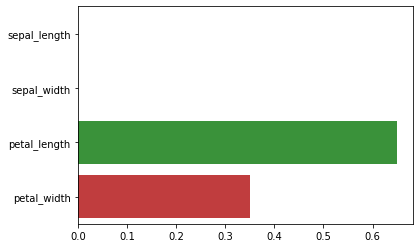

In [20]:
sns.barplot(DT.feature_importances_, X.columns)

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=3, max_depth=2, random_state=2045, n_jobs=-1)
RF.fit(X_train, y_train)

RF_mse = accuracy_score(y_test, RF.predict(X_test))
print(RF_mse)
print(confusion_matrix(y_test, RF.predict(X_test)))

0.9333333333333333
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


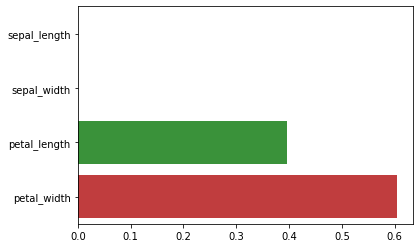

In [25]:
import matplotlib.pyplot as plt

sns.barplot(RF.feature_importances_, X.columns)
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss='deviance', n_estimators=500, learning_rate=0.1, max_features=3, max_depth=3)
GBC.fit(X_train, y_train)

GBC_mse = accuracy_score(y_test, GBC.predict(X_test))
print(GBC_mse)
print(confusion_matrix(y_test, GBC.predict(X_test)))

0.9333333333333333
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


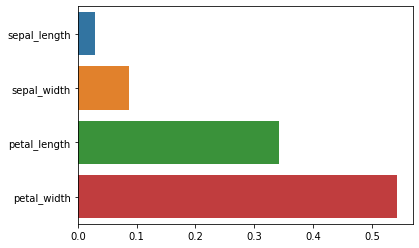

In [26]:
sns.barplot(GBC.feature_importances_, X.columns)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators=1000, learning_rate=0.001, random_state=2045)
ABC.fit(X_train, y_train)

ABC_mse = accuracy_score(y_test, ABC.predict(X_test))
print(ABC_mse)
print(confusion_matrix(y_test, ABC.predict(X_test)))

0.8888888888888888
[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


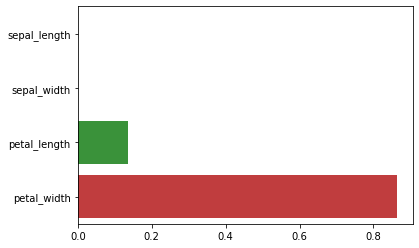

In [28]:
sns.barplot(ABC.feature_importances_, X.columns)

In [29]:
from xgboost import XGBClassifier
XGB = XGBClassifier(booster='gbtree', n_estimators=500, learning_rate=0.5, reg_lambda=0.05, n_jobs=-1)
XGB.fit(X_train, y_train)

XGB_mse = accuracy_score(y_test, XGB.predict(X_test))
print(XGB_mse)
print(confusion_matrix(y_test, XGB.predict(X_test)))

0.9111111111111111
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


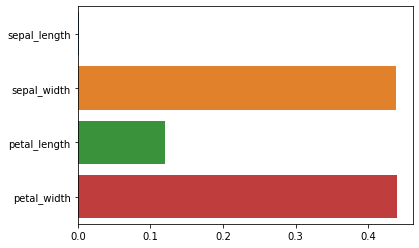

In [30]:
sns.barplot(XGB.feature_importances_, X.columns)
plt.show()

In [33]:
from lightgbm import LGBMClassifier

LGB = LGBMClassifier(n_estimators=500, max_depth=3, learning_rate=0.5, reg_lambda=0.2, n_jobs=-1)
LGB.fit(X_train, y_train)

LGB_mse = accuracy_score(y_test, LGB.predict(X_test))
print(LGB_mse)
print(confusion_matrix(y_test, LGB.predict(X_test)))

0.9555555555555556
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [34]:
a = [LR_mse, DT_mse,RF_mse,GBC_mse, ABC_mse, XGB_mse, LGB_mse]
model = ['LR','DT','RF','GBC','ABC','XGB','LGB']
mse = []
for i in a :
  print(i)
  mse.append(i)

0.9333333333333333
0.8888888888888888
0.9333333333333333
0.9333333333333333
0.8888888888888888
0.9111111111111111
0.9555555555555556


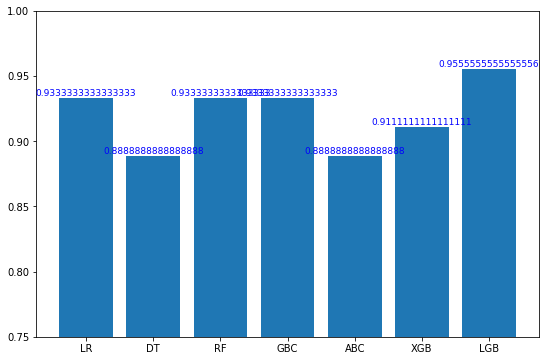

In [46]:
plt.figure(figsize=(9,6))
plt.bar(model, mse)
plt.ylim(0.75, 1.0)
for i, v in enumerate(model):
  plt.text(v, mse[i], mse[i],
           fontsize= 9, color='blue', horizontalalignment='center', verticalalignment='bottom')
plt.show()